In [4]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('files_for_lab/anova_lab_data.xlsx')
data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


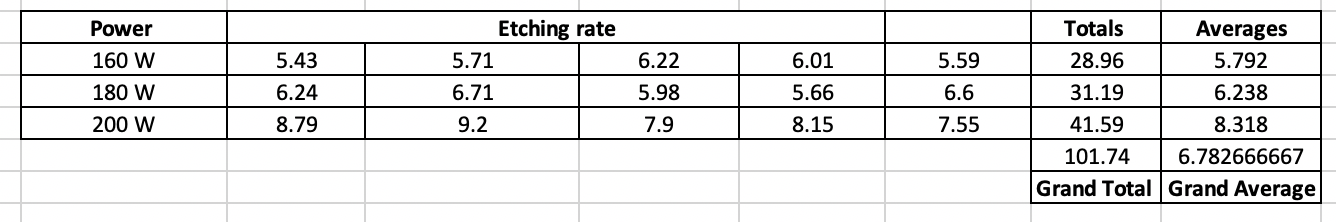

In [7]:
from PIL import Image
import requests

im = Image.open(requests.get('https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.05/7.05-lab_data.png', stream=True).raw)
im

#### Part 1

In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on: - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table

#### Context

Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data anova_lab_data.xlsx file in the files_for_lab folder

- State the null hypothesis
- State the alternate hypothesis
- What is the significance level
- What are the degrees of freedom of model, error terms, and total DoF

1. Null hypothesis

H0: μ1=μ2=μ3 (the means are similar) where μ1: the mean of the first group with power 160 W, μ2: the mean of the second group with power 180 W and μ3: the mean of the third group with power 200 W

2. Alternate hypothesis

H1: not all μ are equal (at least one μ is different from the others)

3. Level of significance

<= 0.05

4. The degree of freedom

n - 1 = 14

#### Part 2

- In this section, use Python to conduct ANOVA.
- What conclusions can you draw from the experiment and why?

In [8]:
data.columns

Index(['Power ', 'Etching Rate'], dtype='object')

In [9]:
data.columns = data.columns.str.replace(' ', '').str.lower().str.replace('etchingrate', 'etching_rate')
data.columns

Index(['power', 'etching_rate'], dtype='object')

In [11]:
data.power = data.power.apply(lambda x: x.replace(' W', '') if x.endswith('W') else x).astype(int)
data.power.unique()

array([160, 180, 200])

In [12]:
data.describe()

,power,etching_rate
count,15.000000,15.000000
mean,180.000000,6.782667
std,16.903085,1.228643
min,160.000000,5.430000
25%,160.000000,5.845000
50%,180.000000,6.240000
75%,200.000000,7.725000
max,200.000000,9.200000


In [13]:
data.groupby('power').agg(np.mean)

,etching_rate
power,
160,5.792
180,6.238
200,8.318


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
model = ols('etching_rate ~ C(power)',data=data).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


The "power" row is between group factor, the "residual" row is within group factor.

df(power) = 3 - 1 = 2 (since there are 3 groups that being tested)
df(residual) = 15 - 3 = 12 (15 observations, 3 groups)

F-statistics of "power" is 36.878955, which is very large, indicating that the "power" factor is a significant predictor of the dependant variable.

The P value 0.000008 is lower than our selected level of significance of 0.05, so we can reject the null hypothesis - which means that one of the power level of the beaming machine has an effect on the etching rate of the machine.